# 初心者向けチュートリアル

## 概要

公式の初心者向けチュートリアルをトレースしながら、baselineを作成する。

* Notebook: https://www.guruguru.science/competitions/21/discussions/ab028e86-d011-485e-8844-45d15717fec4/
* 配信URL: https://youtube.com/live/61lrElGgDSs?feature=share

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import polars as pl
import seaborn as sns
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", 30)
pl.Config.set_tbl_cols(999)
pl.Config.set_tbl_rows(30)

# plt.style.use("ggplot")
sns.set()
plt.rcParams["font.family"] = ["Noto Sans JP", "IPAexGothic"]
plt.rcParams["mathtext.fontset"] = "cm"
# plt.rcParams["font.size"] = 10.5

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [9]:
import os
from time import time


class Timer:
    def __init__(
        self, logger=None, format_str="{:.3f}[s]", prefix=None, suffix=None, sep=" "
    ):
        if prefix:
            format_str = str(prefix) + sep + format_str
        if suffix:
            format_str = format_str + sep + str(suffix)
        self.format_str = format_str
        self.logger = logger
        self.start = None
        self.end = None

    @property
    def duration(self):
        if self.end is None:
            return 0
        return self.end - self.start

    def __enter__(self):
        self.start = time()

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end = time()
        out_str = self.format_str.format(self.duration)
        if self.logger:
            self.logger.info(out_str)
        else:
            print(out_str)

In [10]:
INPUT_DIR = "../data/"
OUTPUT_DIR = "../output"

In [5]:
df_anime = pd.read_csv("../data/anime.csv")
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

In [6]:
from ydata_profiling import ProfileReport

report = ProfileReport(df_anime)

In [11]:
report.to_file(os.path.join(OUTPUT_DIR, "anime_report.html"))

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
train_report = ProfileReport(df_train)
test_report = ProfileReport(df_test)
compare_report = train_report.compare(test_report)
compare_report.to_file(os.path.join(OUTPUT_DIR, "compare_train_test.html"))

/home/kazu/.virtualenvs/ds/lib/python3.10/site-packages/ydata_profiling/compare_reports.py:192: UserWarning:

The datasets being profiled have a different set of columns. Only the left side profile will be calculated.



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: >

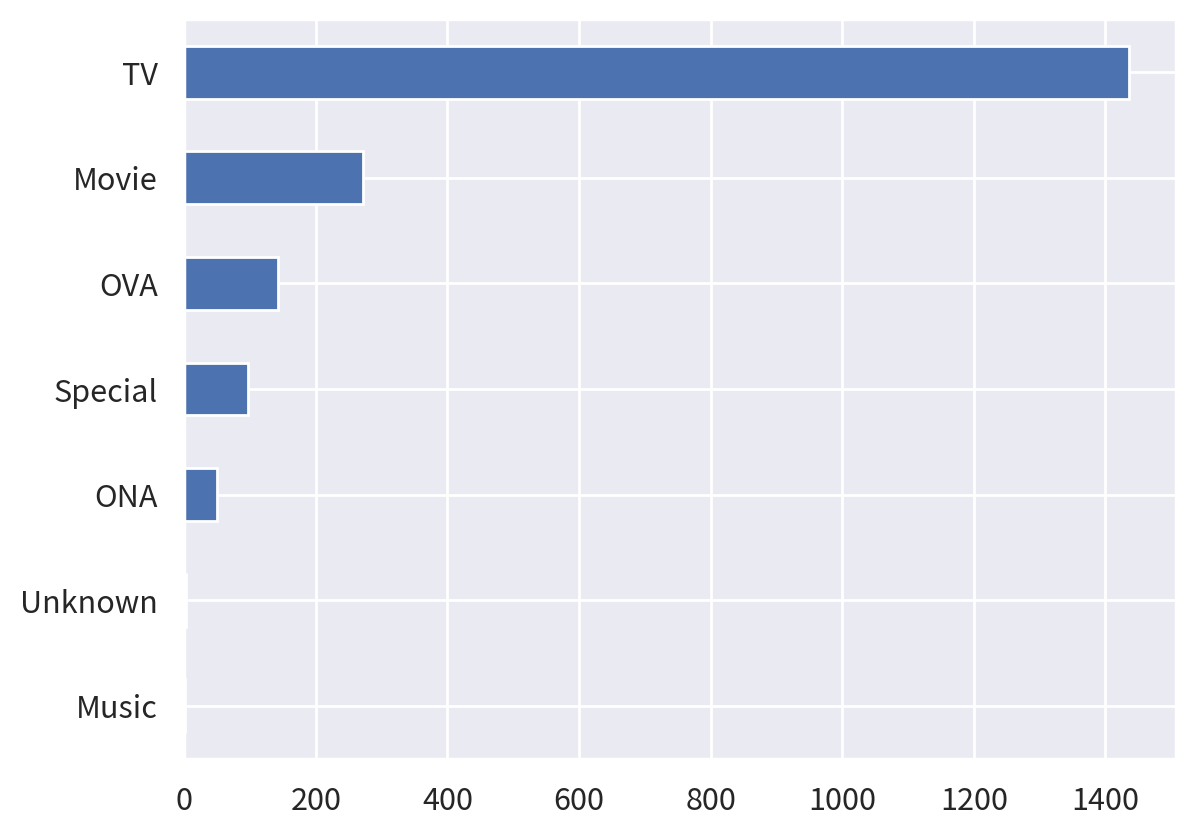

In [28]:
df_anime.type.value_counts()[::-1].plot.barh()

In [ ]:
df